## Подготовительная работа

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 12) for n in range(1, 12)])
# rows += 
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('Длина проводника, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Кол-во витков')
    return ax, res

def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Шаг, мм')
    return ax, res

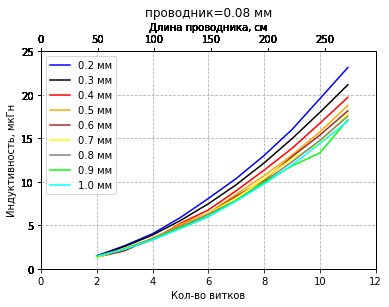

In [3]:
ax_coil_n_008, _ = plot_step_stat(rects, step=0.2, wire=0.08, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.08, color=col, ax=ax_coil_n_008)

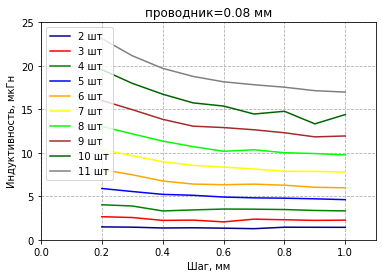

In [4]:
ax_step_008, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.08, ax=ax_step_008, color=col)

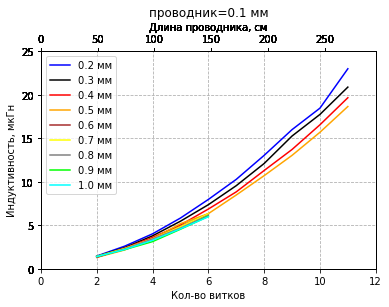

In [5]:
ax_coil_n_01, _ = plot_step_stat(rects, step=0.2, wire=0.1, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.1, color=col, ax=ax_coil_n_01)

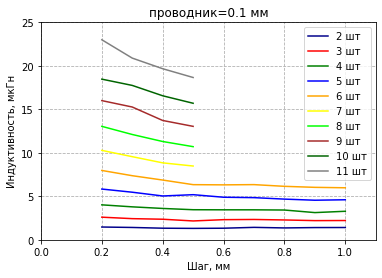

In [6]:
ax_step_01, res = plot_coil_n_stat(rects, coil_n=2, wire=0.1, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.1, color=col, ax=ax_step_01)

## провод 0.08 мм, четыре широких зубца:

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done
242,VEXPN1,113.939,0.08,0.5,4.0,79.0,49.0,3.876,20240.0,60.0,rect-teeth-4-1-3?,+
244,VEXPN1_1,89.632,0.08,0.5,3.0,79.0,49.0,2.527,24000.0,22.0,rect-teeth-4-1-2,+
246,VEXPN1_2,121.935,0.08,0.5,4.0,79.0,49.0,3.934,20070.0,57.0,rect-teeth-4-2-2,+
248,VEXPN1_3,97.625,0.08,0.5,3.0,79.0,49.0,2.651,24000.0,22.0,rect-teeth-4-2-1,+
250,VEXPN1_4,129.931,0.08,0.5,4.0,79.0,49.0,2.836,19520.0,54.0,rect-teeth-4-3-1,+
252,VEXPN1_5,105.616,0.08,0.5,3.0,79.0,49.0,2.837,24000.0,22.0,rect-teeth-4-3-0,+


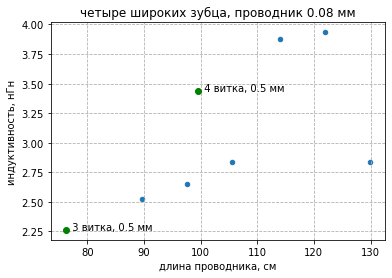

In [7]:
expn1_008 = df.loc[df['file'].str.match('VEXPN1')]
expn1_008 = expn1_008.loc[expn1_008['wire_dia (mm)'] == 0.08]
ts_008 = [v for v in expn1_008['mod']]
ls_008 = list(expn1_008['L, uH'])

ax = expn1_008.plot.scatter(x='wire_len (cm)', y='L, uH', title='четыре широких зубца, проводник 0.08 мм')
ax.grid(linestyle='--')
# ax.set_xlim(100, 112)
# ax.set_ylim(3.9, 4.2)
ax.set_ylabel('индуктивность, нГн')
ax.set_xlabel('длина проводника, см')

rect_3_05_008 = df.loc[(df['file'] == 'V205') & (df['wire_dia (mm)'] == 0.08)]
rect_4_05_008 = df.loc[(df['file'] == 'V305') & (df['wire_dia (mm)'] == 0.08)]

r_len = [rect_3_05_008['wire_len (cm)'], rect_4_05_008['wire_len (cm)']]
r_L = [rect_3_05_008['L, uH'], rect_4_05_008['L, uH']]
for rl, rL, txt in zip(r_len, r_L, ['3 витка, 0.5 мм', '4 витка, 0.5 мм']):
    ax.plot(rl, rL, 'go')
    ax.text(rl, rL, f'  {txt}')

expn1_008

<ipython-input-8-9a06e7518100>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rect_3_05_008['Lsqrt'] = rect_3_05_008['L, uH'].apply(lambda x: 1/math.sqrt(x))
<ipython-input-8-9a06e7518100>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rect_4_05_008['Lsqrt'] = rect_4_05_008['L, uH'].apply(lambda x: 1/math.sqrt(x))


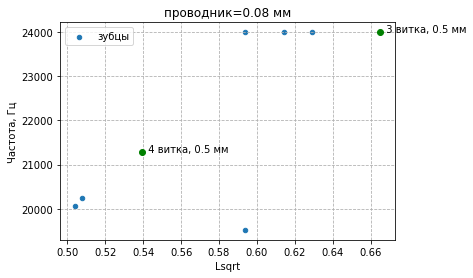

In [8]:
expn1_008['Lsqrt'] = expn1_008['L, uH'].apply(lambda x: 1/math.sqrt(x))
ax = expn1_008.plot.scatter(x='Lsqrt', y='freq', title=f'проводник=0.08 мм', label='зубцы')
ax.grid(linestyle='--')
# ax.set_xlim(0.48, 0.55)
# ax.set_ylim(19000, 20000)
ax.set_ylabel('Частота, Гц')
ax.set_xlabel('Lsqrt')

rect_3_05_008['Lsqrt'] = rect_3_05_008['L, uH'].apply(lambda x: 1/math.sqrt(x))
rect_4_05_008['Lsqrt'] = rect_4_05_008['L, uH'].apply(lambda x: 1/math.sqrt(x))

ref_Lsqrt = [rect_3_05_008['Lsqrt'], rect_4_05_008['Lsqrt']]
ref_freq = [rect_3_05_008['freq'], rect_4_05_008['freq']]

for rlsq, rf, txt in zip(ref_Lsqrt, ref_freq, ['3 витка, 0.5 мм', '4 витка, 0.5 мм']):
    ax.plot(rlsq, rf, 'go')
    ax.text(rlsq, rf, f'  {txt}')

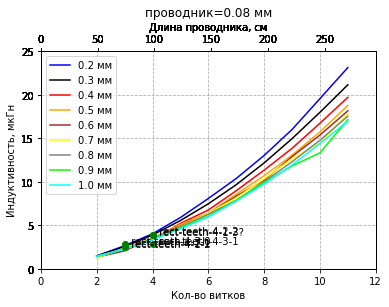

In [9]:
for t, l, n in zip(ts_008, ls_008, [4, 3, 4, 3, 4, 3]):
    ax_coil_n_008.plot(n, l, 'go')
    ax_coil_n_008.text(n, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_008.figure

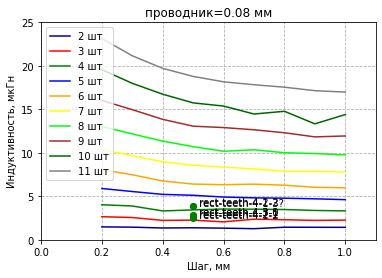

In [10]:
for t, l, s in zip(ts_008, ls_008, [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
    ax_step_008.plot(s, l, 'go')
    ax_step_008.text(s, l, f'  {t}')

ax_step_008.figure

## провод 0.1 мм, четыре широких зубца:

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done
243,VEXPN1,113.939,0.1,0.5,4.0,79.0,49.0,3.753,20340.0,66.0,rect-teeth-4-1-3?,+
245,VEXPN1_1,89.632,0.1,0.5,3.0,79.0,49.0,2.523,24000.0,22.0,rect-teeth-4-1-2,+
247,VEXPN1_2,121.935,0.1,0.5,4.0,79.0,49.0,3.902,20170.0,62.0,rect-teeth-4-2-2,+
249,VEXPN1_3,97.625,0.1,0.5,3.0,79.0,49.0,2.638,24000.0,22.0,rect-teeth-4-2-1,+
251,VEXPN1_4,129.931,0.1,0.5,4.0,79.0,49.0,4.004,19840.0,60.0,rect-teeth-4-3-1,+
253,VEXPN1_5,105.616,0.1,0.5,3.0,79.0,49.0,2.736,24000.0,22.0,rect-teeth-4-3-0,+


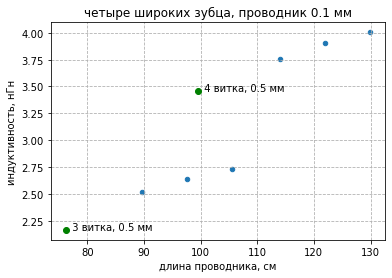

In [11]:
expn1_01 = df.loc[df['file'].str.match('VEXPN1')]
expn1_01 = expn1_01.loc[expn1_01['wire_dia (mm)'] == 0.1]
ts_01 = [v for v in list(expn1_01['mod'])]
ls_01 = list(expn1_01['L, uH'])
         
ax = expn1_01.plot.scatter(x='wire_len (cm)', y='L, uH', title='четыре широких зубца, проводник 0.1 мм')
ax.grid(linestyle='--')
# ax.set_xlim(100, 112)
# ax.set_ylim(3.9, 4.2)
ax.set_ylabel('индуктивность, нГн')
ax.set_xlabel('длина проводника, см')

rect_3_05_01 = df.loc[(df['file'] == 'V205') & (df['wire_dia (mm)'] == 0.1)]
rect_4_05_01 = df.loc[(df['file'] == 'V305') & (df['wire_dia (mm)'] == 0.1)]

r_len = [rect_3_05_01['wire_len (cm)'], rect_4_05_01['wire_len (cm)']]
r_L = [rect_3_05_01['L, uH'], rect_4_05_01['L, uH']]
for rl, rL, txt in zip(r_len, r_L, ['3 витка, 0.5 мм', '4 витка, 0.5 мм']):
    ax.plot(rl, rL, 'go')
    ax.text(rl, rL, f'  {txt}')
         
expn1_01

<ipython-input-12-73d717349869>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rect_3_05_01['Lsqrt'] = rect_3_05_01['L, uH'].apply(lambda x: 1/math.sqrt(x))
<ipython-input-12-73d717349869>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rect_4_05_01['Lsqrt'] = rect_4_05_01['L, uH'].apply(lambda x: 1/math.sqrt(x))


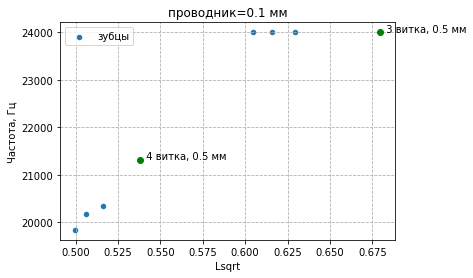

In [12]:
expn1_01['Lsqrt'] = expn1_01['L, uH'].apply(lambda x: 1/math.sqrt(x))
ax = expn1_01.plot.scatter(x='Lsqrt', y='freq', title=f'проводник=0.1 мм', label='зубцы')
ax.grid(linestyle='--')
# ax.set_xlim(0.48, 0.55)
# ax.set_ylim(19000, 20000)
ax.set_ylabel('Частота, Гц')
ax.set_xlabel('Lsqrt')

rect_3_05_01['Lsqrt'] = rect_3_05_01['L, uH'].apply(lambda x: 1/math.sqrt(x))
rect_4_05_01['Lsqrt'] = rect_4_05_01['L, uH'].apply(lambda x: 1/math.sqrt(x))

ref_Lsqrt = [rect_3_05_01['Lsqrt'], rect_4_05_01['Lsqrt']]
ref_freq = [rect_3_05_01['freq'], rect_4_05_01['freq']]

for rlsq, rf, txt in zip(ref_Lsqrt, ref_freq, ['3 витка, 0.5 мм', '4 витка, 0.5 мм']):
    ax.plot(rlsq, rf, 'go')
    ax.text(rlsq, rf, f'  {txt}')

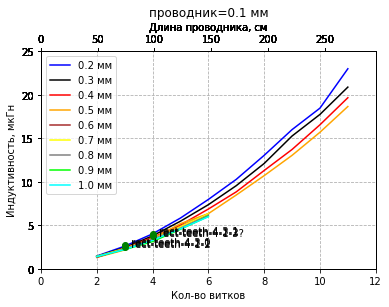

In [13]:
for t, l, n in zip(ts_01, ls_01, [4, 3, 4, 3, 4, 3]):
    ax_coil_n_01.plot(n, l, 'go')
    ax_coil_n_01.text(n, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_01.figure

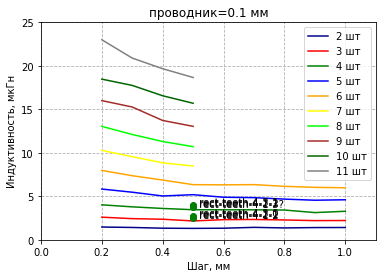

In [14]:
for t, l, s in zip(ts_01, ls_01, [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]):
    ax_step_01.plot(s, l, 'go')
    ax_step_01.text(s, l, f'  {t}')

ax_step_01.figure